In [22]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

train_files_cyclone = "/train/Cyclone"
train_files_earthquake = "/train/Earthquake"
train_files_flood = "/train/Flood"
train_files_wildfire = "/train/Wildfire"

test_files_cyclone = "/test/Cyclone"
test_files_earthquake = "/test/Earthquake"
test_files_flood = "/test/Flood"
test_files_wildfire = "/test/Wildfire"

val_files_cyclone = "/val/Cyclone"
val_files_earthquake = "/val/Earthquake"
val_files_flood = "/val/Flood"
val_files_wildfire = "/val/Wildfire"


In [23]:
import sys
!python --version
print(sys.prefix)

Python 3.10.4c:\Users\ASUS\envs\test



In [24]:
# import torch
# import torchvision

# from torch import nn
# from torchvision import transforms
# torch.__version__

In [25]:
# device = "cuda" if torch.cuda.is_available() else "cpu"
# device

In [26]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory('D:/dsproject/vit/disaster/train',
                                                    target_size=(225, 225),
                                                    batch_size=16,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('D:/dsproject/vit/disaster/val',
                                                        target_size=(225, 225),
                                                        batch_size=8,
                                                        class_mode='categorical')

Found 3396 images belonging to 4 classes.
Found 120 images belonging to 4 classes.


In [28]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=2,
                    validation_data=validation_generator,
                    validation_batch_size=8
                    )

Epoch 1/2
213/213 [==============================] - 248s 1s/step - loss: 1.1847 - accuracy: 0.6284 - val_loss: 0.7189 - val_accuracy: 0.7833
Epoch 2/2
213/213 [==============================] - 177s 829ms/step - loss: 0.6178 - accuracy: 0.7677 - val_loss: 0.7790 - val_accuracy: 0.7500


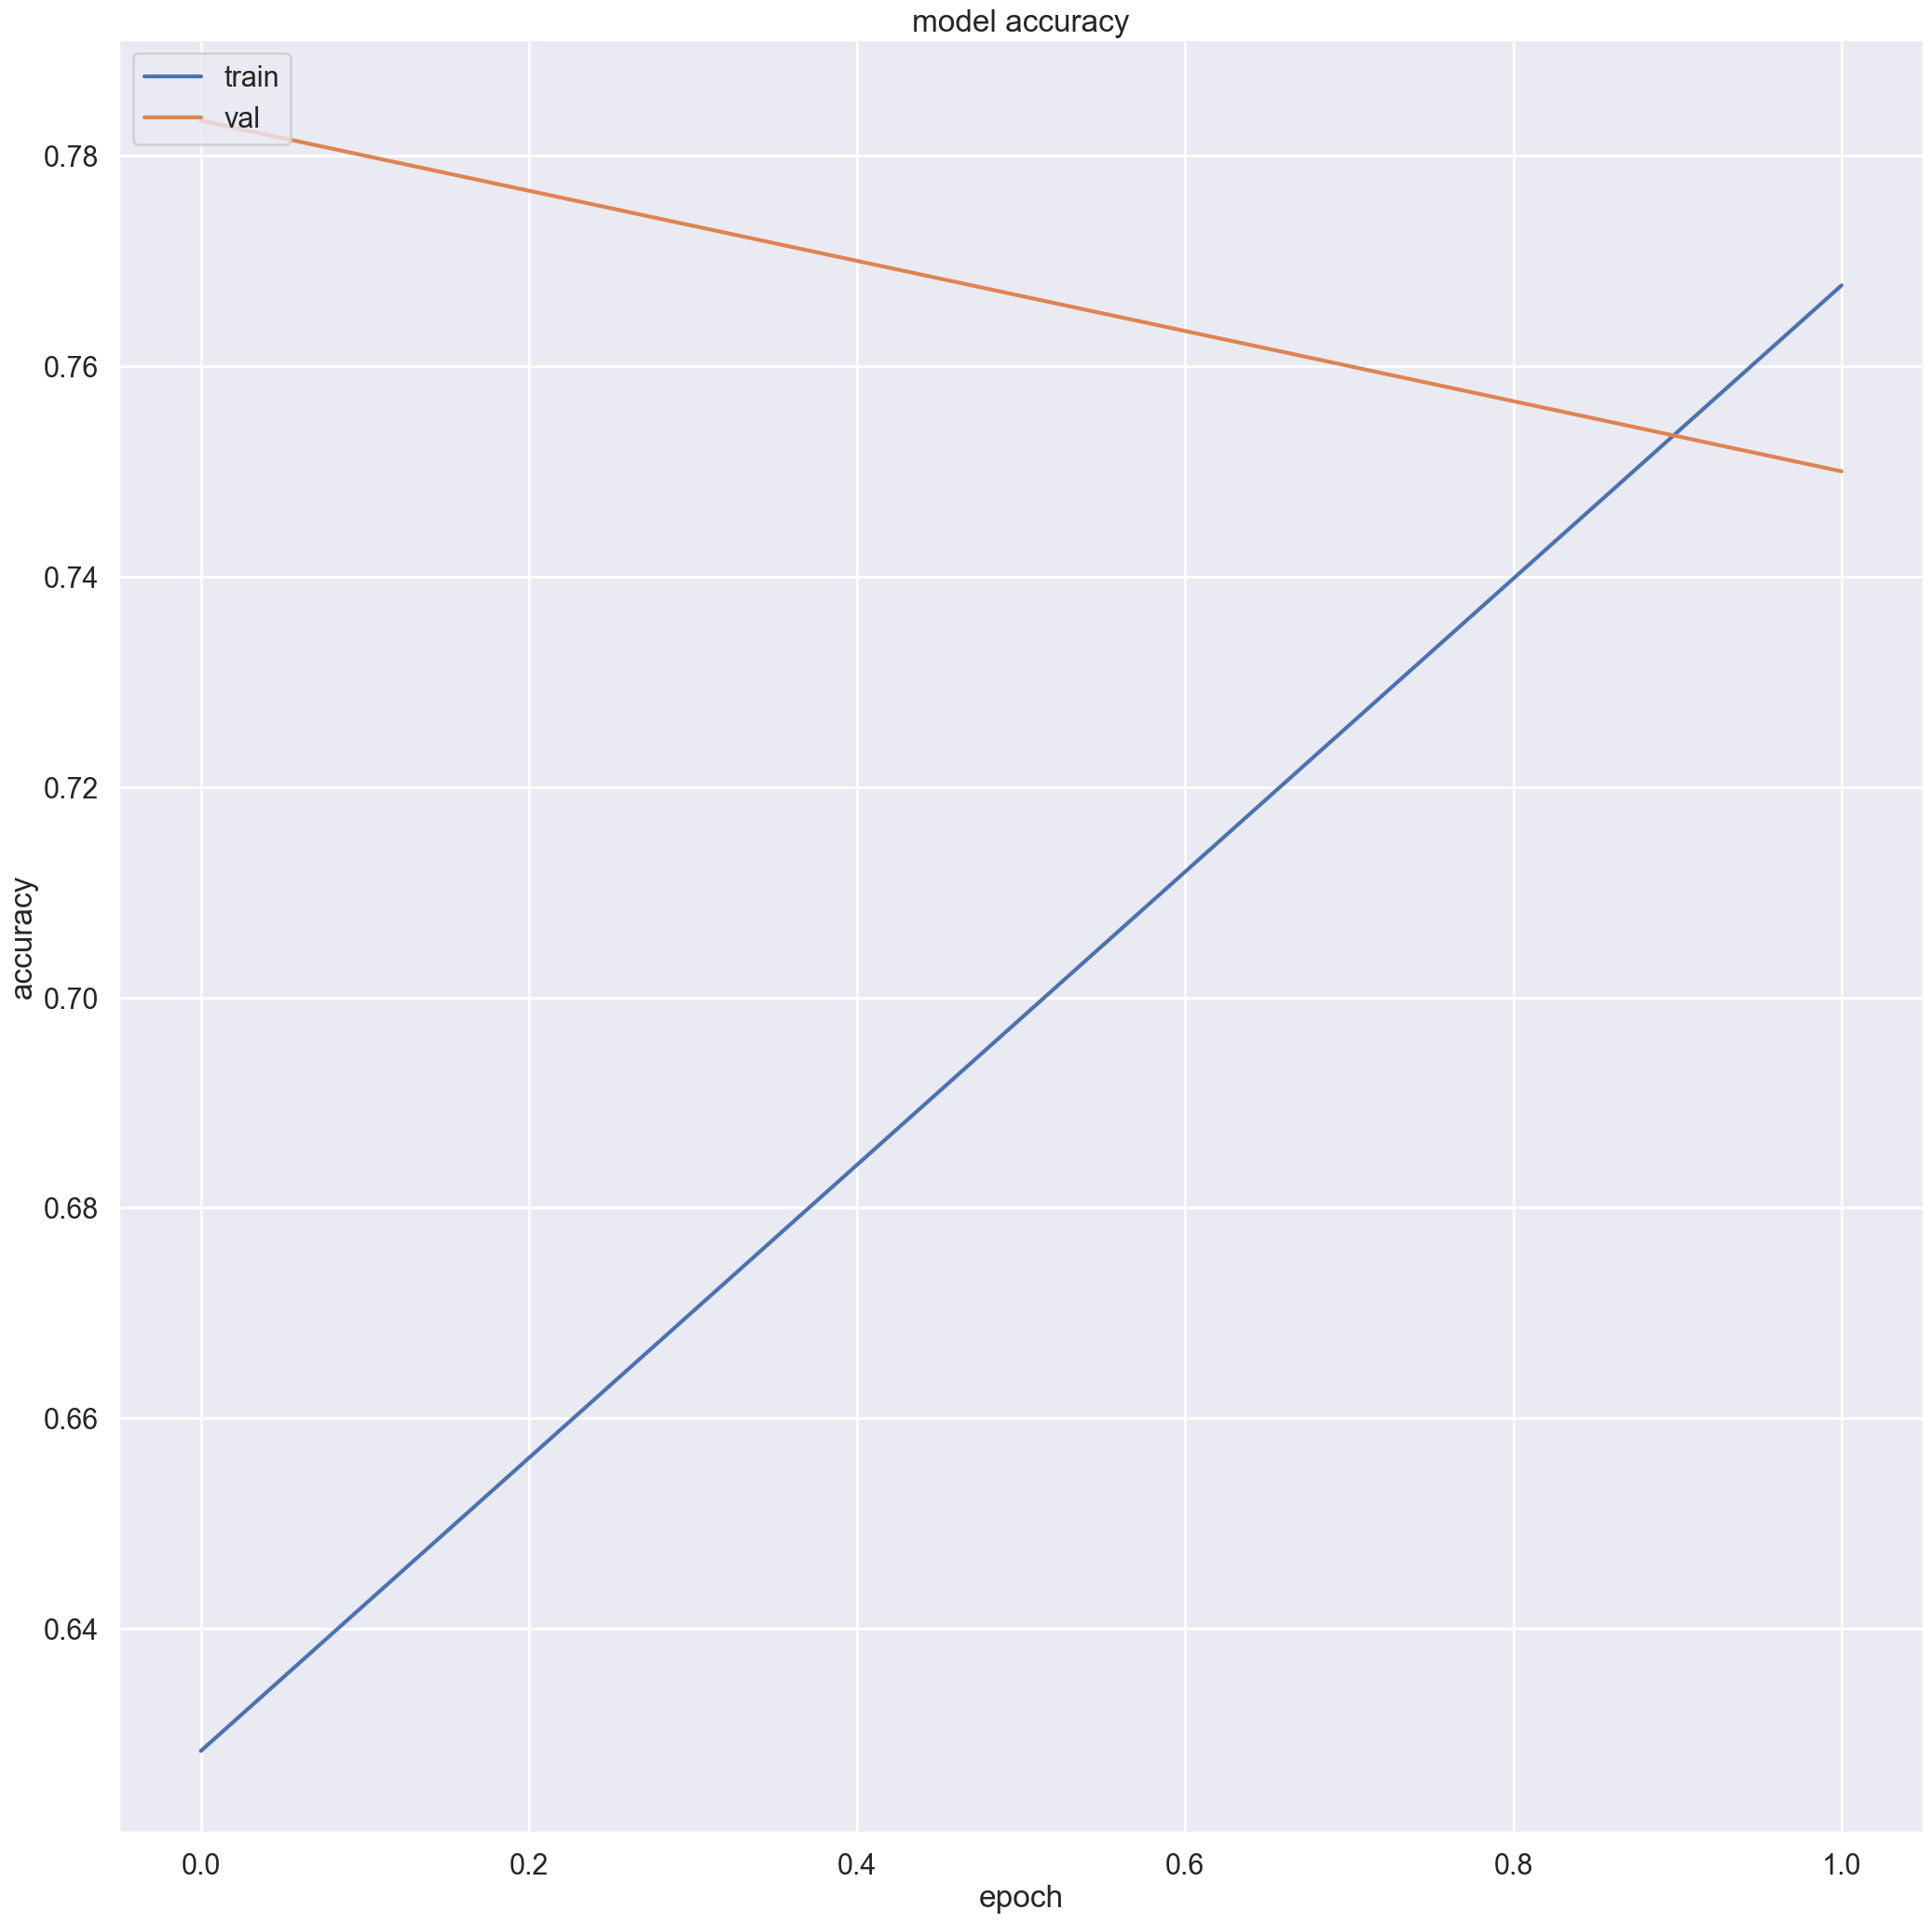

In [31]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns
sns.set_theme()
sns.set_context("poster")

figure(figsize=(25, 25), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [32]:
model.save("model.h5")

c:\Users\ASUS\envs\test\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

x = preprocess_image('train/Wildfire/4.jpg')

In [40]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 0s 25ms/step


array([1.8916046e-03, 6.0409174e-04, 1.4639353e-07, 9.9750417e-01],
      dtype=float32)

In [41]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
labels

{0: 'Cyclone', 1: 'Earthquake', 2: 'Flood', 3: 'Wildfire'}

In [42]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)

Wildfire
